In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
boat = pd.read_csv('boat_data.csv')

In [3]:
boat.rename(columns={'Number of views last 7 days':'views'}, inplace=True)

In [4]:
boat['moeda'] = boat['Price'].str.split(' ', expand=True).get(1)

In [5]:
boat['preco'] = boat['Price'].str.split(' ', expand=True).get(0)

In [6]:
boat.rename(columns ={'moeda':'valor','preco':'moeda'}, inplace=True)

In [7]:
boat['valor'] = boat['valor'].astype('int')

In [8]:
boat['moeda']=boat['moeda'].replace({'Â£':'GBP'})

In [9]:
def get_net_sale_value(df_row):
	if df_row['moeda'] == 'GBP':
		net_sale_value = df_row['valor']*1.07
	elif df_row['moeda'] =='EUR':
	    net_sale_value = df_row['valor']*0.96
	elif df_row['moeda']=='CHF':
	    net_sale_value = df_row['valor']*1.01
	elif df_row['moeda'] =='DKK':
	    net_sale_value = df_row['valor']*0.13
	else:
	    net_sale_value = 0
	return net_sale_value

In [10]:
boat['valor_USD'] = boat.apply(get_net_sale_value, axis=1)

In [11]:
boat[['moeda','valor_USD']].head()

,moeda,valor_USD
0,CHF,3370.37
1,EUR,3350.40
2,CHF,3807.70
3,DKK,3367.00
4,EUR,3263.04


In [12]:
boat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         9888 non-null   object 
 1   Boat Type     9888 non-null   object 
 2   Manufacturer  8550 non-null   object 
 3   Type          9882 non-null   object 
 4   Year Built    9888 non-null   int64  
 5   Length        9879 non-null   float64
 6   Width         9832 non-null   float64
 7   Material      8139 non-null   object 
 8   Location      9852 non-null   object 
 9   views         9888 non-null   int64  
 10  valor         9888 non-null   int32  
 11  moeda         9888 non-null   object 
 12  valor_USD     9888 non-null   float64
dtypes: float64(3), int32(1), int64(2), object(7)
memory usage: 965.8+ KB


In [13]:
bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
boat['price_category'] = pd.qcut(boat['valor_USD'], q=[0, .2, .4, .6, .8, 1], labels = bin_labels_5)

In [14]:
boat_type100=boat['Boat Type'].value_counts().head(100)

In [15]:
boat.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,views,valor,moeda,valor_USD,price_category
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,226,3337,CHF,3370.37,Bronze
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75,3490,EUR,3350.40,Bronze
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124,3770,CHF,3807.70,Bronze
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,64,25900,DKK,3367.00,Bronze
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58,3399,EUR,3263.04,Bronze


In [16]:
boat['price_category'].value_counts()

Silver      2013
Bronze      1978
Diamond     1977
Gold        1962
Platinum    1958
Name: price_category, dtype: int64

In [17]:
# MOST VIEWED BY CATEGORIA DE PRECO  
boat.groupby('price_category')['views'].sum()

price_category
Bronze      423616
Silver      312847
Gold        276816
Platinum    237921
Diamond     223702
Name: views, dtype: int64

In [18]:
# MOST VIEWED BY BOAT TYPE ------------------------------------------
boat.groupby('Boat Type')['views'].sum().sort_values(ascending=False).head()

Boat Type
Motor Yacht    351659
Sport Boat     251418
Cabin Boat     131700
Flybridge      127534
Trawler         75456
Name: views, dtype: int64

In [19]:
# MOST VIEWED BY MANUFACTURER ----------
boat.groupby('Manufacturer')['views'].sum().sort_values(ascending=False).head()

Manufacturer
BÃ©nÃ©teau power boats    56211
Sunseeker power boats     51110
Jeanneau power boats      51070
Sea Ray power boats       45387
Princess power boats      39051
Name: views, dtype: int64

In [20]:
# MOST VIEWED BY TYPE ------------------------------------------
boat.groupby('Type')['views'].sum().sort_values(ascending=False).head()

Type
Used boat,Diesel                538140
Used boat,Unleaded              408134
Used boat                       183563
new boat from stock,Unleaded    134863
new boat from stock              89795
Name: views, dtype: int64

In [21]:
boat.columns

Index(['Price', 'Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length',
       'Width', 'Material', 'Location', 'views', 'valor', 'moeda', 'valor_USD',
       'price_category'],
      dtype='object')

In [22]:
boat['YearCat'] = pd.qcut(boat['Year Built'], q=5)

In [23]:
boat.groupby('YearCat')['views'].sum().sort_values(ascending=False)

YearCat
(-0.001, 1992.0]    379144
(2010.0, 2019.0]    333690
(1992.0, 2004.0]    312749
(2004.0, 2010.0]    262329
(2019.0, 2021.0]    186990
Name: views, dtype: int64

In [24]:
top_10 = boat.sort_values('views', ascending=False).head(10)

In [25]:
top_10

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,views,valor,moeda,valor_USD,price_category,YearCat
9580,CHF 14900,Motor Yacht,Bayliner power boats,"Used boat,Unleaded",1992,7.70,2.46,Plastic,Switzerland,3263,14900,CHF,15049.00,Bronze,"(-0.001, 1992.0]"
8723,CHF 35000,Hardtop,Princess power boats,"Used boat,Diesel",1979,11.12,3.88,GRP,Switzerland,2432,35000,CHF,35350.00,Silver,"(-0.001, 1992.0]"
6211,CHF 125900,"Bowrider,Motor Yacht,Sport Boat",Windy power boats,"Used boat,Diesel",2002,12.35,3.48,GRP,Switzerland,2261,125900,CHF,127159.00,Gold,"(1992.0, 2004.0]"
3700,EUR 949000,Hardtop,Pershing power boats,"Used boat,Diesel",2009,20.30,5.20,GRP,Neustadt,2154,949000,EUR,911040.00,Diamond,"(2004.0, 2010.0]"
308,CHF 19900,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1993,6.14,2.34,Plastic,Switzerland,2026,19900,CHF,20099.00,Bronze,"(1992.0, 2004.0]"
894,CHF 48500,Cabin Boat,Viper power boats,"Used boat,Unleaded",2014,6.65,2.30,GRP,Switzerland,1970,48500,CHF,48985.00,Silver,"(2010.0, 2019.0]"
9878,CHF 4999,"Sport Boat,Wakeboard/Wakesurf,Water ski",Tullio Abbate power boats,"Used boat,Unleaded",1980,6.00,2.10,GRP,Switzerland,1917,4999,CHF,5048.99,Bronze,"(-0.001, 1992.0]"
8684,CHF 36000,Sport Boat,Correct Craft power boats,"Used boat,Unleaded",2005,6.40,2.31,GRP,Switzerland,1834,36000,CHF,36360.00,Silver,"(2004.0, 2010.0]"
9843,CHF 6500,Sport Boat,Baha power boats,"Used boat,Unleaded",1995,6.80,2.38,GRP,Thun,1831,6500,CHF,6565.00,Bronze,"(1992.0, 2004.0]"
35,CHF 3800,Cabin Boat,Draco power boats,"Used boat,Unleaded",1980,6.20,2.45,GRP,Switzerland,1804,3800,CHF,3838.00,Bronze,"(-0.001, 1992.0]"


In [26]:
bin_labels_10 = ['30 Years (Up to 1992)','Up to 30 Years (From 1992 onwards)','Up to 18 Years (From 2004 onwards)','Up to 12 Years (From 2010 onwards)','Up to 3 Years (From 2019 onwards)']
boat['Anos'] = pd.qcut(boat['Year Built'], q=[0, .2, .4, .6, .8, 1], labels = bin_labels_10)

In [27]:
bin_labels_ = ["From 6.2 to 7 mts", "From 3. to 6.24 mts", "From 8.3 to 11 mts","From 11 to 54 mts", "From 7 to 8.4 mts" ]
boat['Tam_Boat'] = pd.qcut(boat['Length'], q=[0, .2, .4, .6, .8, 1], labels = bin_labels_)

In [28]:
boat.to_csv('boat.csv')

In [29]:
top_100 = boat.sort_values('views', ascending=False).head(100)

In [30]:
top_100.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,views,valor,moeda,valor_USD,price_category,YearCat,Anos,Tam_Boat
9580,CHF 14900,Motor Yacht,Bayliner power boats,"Used boat,Unleaded",1992,7.70,2.46,Plastic,Switzerland,3263,14900,CHF,15049.0,Bronze,"(-0.001, 1992.0]",30 Years (Up to 1992),From 3. to 6.24 mts
8723,CHF 35000,Hardtop,Princess power boats,"Used boat,Diesel",1979,11.12,3.88,GRP,Switzerland,2432,35000,CHF,35350.0,Silver,"(-0.001, 1992.0]",30 Years (Up to 1992),From 8.3 to 11 mts
6211,CHF 125900,"Bowrider,Motor Yacht,Sport Boat",Windy power boats,"Used boat,Diesel",2002,12.35,3.48,GRP,Switzerland,2261,125900,CHF,127159.0,Gold,"(1992.0, 2004.0]",Up to 30 Years (From 1992 onwards),From 11 to 54 mts
3700,EUR 949000,Hardtop,Pershing power boats,"Used boat,Diesel",2009,20.30,5.20,GRP,Neustadt,2154,949000,EUR,911040.0,Diamond,"(2004.0, 2010.0]",Up to 18 Years (From 2004 onwards),From 7 to 8.4 mts
308,CHF 19900,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1993,6.14,2.34,Plastic,Switzerland,2026,19900,CHF,20099.0,Bronze,"(1992.0, 2004.0]",Up to 30 Years (From 1992 onwards),From 6.2 to 7 mts


In [31]:
top_100.to_csv('top_100.csv')

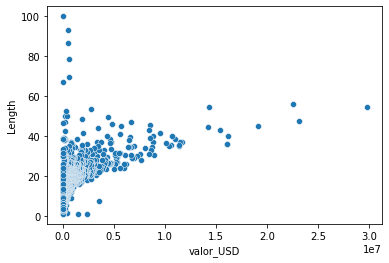

In [32]:
sns.scatterplot(x='valor_USD', y='Length', data= boat)
plt.show()

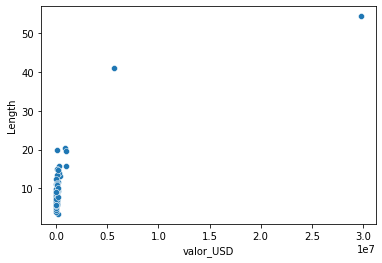

In [33]:
sns.scatterplot(x='valor_USD',y='Length', data=top_100)
plt.show()

In [34]:
boat['valor_USD'].corr(boat['Length'])

0.5626581644813836

In [35]:
boat['valor_USD'].corr(boat['views'])

-0.008113144949470205

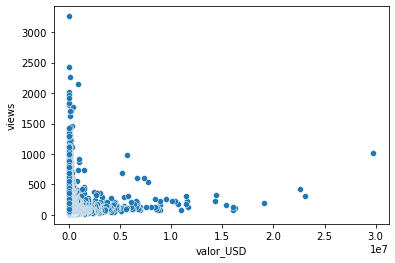

In [36]:
sns.scatterplot(x=boat['valor_USD'], y=boat['views'], data=boat)
plt.show()

In [37]:
# PRECO - VALOR MINIMO E MAXIMO 
print(boat['valor_USD'].min(), boat['valor_USD'].max())

3168.0 29760000.0


In [38]:
# VIEWS - VALOR MINIMO E MAXIMO 
print(boat['views'].min(), boat['views'].max())

13 3263


In [39]:
# MEDIA - ANO DE FABRICACAO - TOP 10
top_10['Year Built'].mean()

1994.9

In [40]:
boat['valor_USD'].describe()

count    9.888000e+03
mean     2.900687e+05
std      9.283458e+05
min      3.168000e+03
25%      4.128000e+04
50%      9.014400e+04
75%      2.387760e+05
max      2.976000e+07
Name: valor_USD, dtype: float64

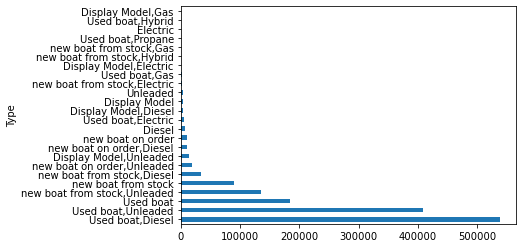

In [41]:
boat.groupby('Type')['views'].sum().sort_values(ascending=False).plot(kind='barh')
plt.show()

In [42]:
top_1000 = boat.sort_values('views', ascending=False).head(1000)

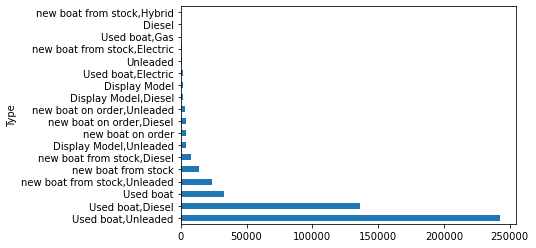

In [43]:
top_1000.groupby('Type')['views'].sum().sort_values(ascending=False).plot(kind='barh')
plt.show()

In [44]:
top_1000.groupby('Type')['views'].sum().sort_values(ascending=False)

Type
Used boat,Unleaded              242379
Used boat,Diesel                136428
Used boat                        33100
new boat from stock,Unleaded     23437
new boat from stock              13835
new boat from stock,Diesel        7397
Display Model,Unleaded            3949
new boat on order                 3826
new boat on order,Diesel          3713
new boat on order,Unleaded        3193
Display Model,Diesel              1700
Display Model                     1579
Used boat,Electric                1455
Unleaded                           996
new boat from stock,Electric       731
Used boat,Gas                      421
Diesel                             421
new boat from stock,Hybrid         384
Name: views, dtype: int64

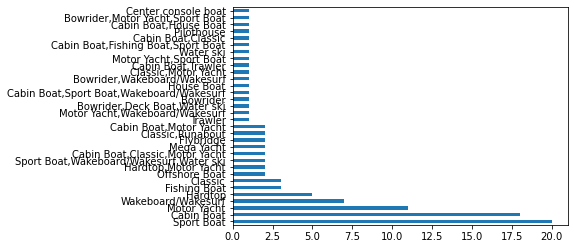

In [45]:
(top_100['Boat Type'].value_counts(normalize=True)*100).plot(kind='barh')
plt.show()

In [46]:
top_1000.to_csv('top1000.csv')

In [47]:
boat['price_category2'] = pd.qcut(boat['valor_USD'], q=5)

In [48]:
boat.groupby('price_category2')['views'].sum()


price_category2
(3167.999, 34495.092]     423616
(34495.092, 66240.0]      312847
(66240.0, 129600.0]       276816
(129600.0, 287040.0]      237921
(287040.0, 29760000.0]    223702
Name: views, dtype: int64

In [49]:
print(boat['valor_USD'].min(), boat['valor_USD'].max())

3168.0 29760000.0
